# ZPIC Python interface

This notebook illustrates the use of the ZPIC Python interface.

Calling ZPIC from Python requires importing the appropriate ZPIC module, in this case em1d.

In [1]:
import em1d

Initializing a ZPIC simulation requires setting the simulation box and timestep

In [2]:
import numpy as np

nx = 120
box = 4 * np.pi
dt = 0.1
tmax = 50.0

ndump = 10

Next we need to describe the particle species in the simulation. In this example (demonstration of the two stream instability) we are using 2 species:

In [32]:
ppc = 500
ufl = [0.2,    0.0,  0.0]
uth = [0.001,0.001,0.001]

right = em1d.Species( "right", -1.0, ppc, ufl = ufl, uth = uth )

ufl[0] = -ufl[0]
left  = em1d.Species( "left", -1.0, ppc, ufl = ufl, uth = uth )

We can now initialize the simulation

In [33]:
sim = em1d.Simulation( nx, box, dt, tmax, [right,left])

Diagnostics are defined in a python function that accepts as a single argument a simulation object. Global variables can also be accessed from this routine:

In [5]:
def report( sim ):
    # sim.n has the current simulation iteration
    if (sim.n % ndump == 0):
        right.report(em1d.Species.particles)
        left.report(em1d.Species.particles)
        sim.emf.report(em1d.EMF.efld,0)

To run the simulation use the `run` method, giving the diagnostics function as the sole parameter:

In [34]:
sim.run(report)

Starting simulation...
n = 500, t = 50.9
Simulation completed.


Simulation results are saved in the ZDF format, as in normal ZPIC simulations, and can now be visualized in the noteboook:

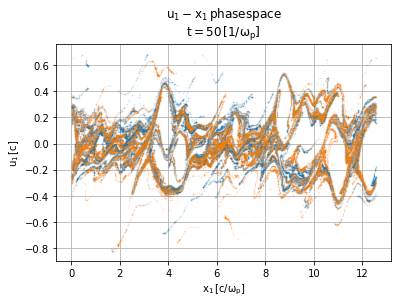

In [36]:
import zdf
import matplotlib.pyplot as plt

(particles,info) = zdf.read("PARTICLES/particles-right-000500.zdf")

x = particles['x1']
y = particles['u1']

plt.plot(x, y, '.', ms=1,alpha=0.1)


title = "u_1-x_1\,phasespace"
timeLabel = "t = {:g}\,[{:s}]".format(info.iteration.t, info.iteration.tunits)

plt.title(r'$\sf{' + title + r'}$' + '\n' + r'$\sf{' + timeLabel + r'}$')

xlabel = "x_1\,[{:s}]".format( info.particles.units['x1'] )
ylabel = "u_1\,[{:s}]".format( info.particles.units['u1'] )

plt.xlabel(r'$\sf{' + xlabel + r'}$')
plt.ylabel(r'$\sf{' + ylabel + r'}$')

(particles,info) = zdf.read("PARTICLES/particles-left-000500.zdf")

x = particles['x1']
y = particles['u1']

plt.plot(x, y, '.', ms=1,alpha=0.1)

plt.grid(True)

plt.show()

In [12]:
import importlib
importlib.reload(zdf)

<module 'zdf' from '/Users/zamb/Source/zpic/python/zdf.py'>